# Credits

Updated to detectwaste by:
* Sylwia Majchrowska

In [460]:
%matplotlib inline
import sys
from pycocotools.coco import COCO
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import skimage
import skimage.io as io
import copy

In [461]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## TrashCan 1.0
- background: under watter
- classes: 8
- comment: captured frames of 3 videos (very similiar photos of the same objects)
- annotation: inastance masks

In [3]:
dataDir='/dih4/dih4_2/wimlds/data/TrashCan_v1/material_version'
dataType='all'
annFile='{}/instances_{}_trashcan.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(', '.join(nms)))

COCO categories: 
trash_etc, trash_fabric, trash_fishing_gear, trash_metal, trash_paper, trash_plastic, trash_rubber, trash_wood

COCO supercategories: 
trash_plastic, trash_wood, trash_rubber, trash_fabric, trash_paper, trash_etc, trash_fishing_gear, trash_metal


Image n°2670
Image name: /dih4/dih4_2/wimlds/data/TrashCan_v1/material_version/all/vid_000251_frame0000020.jpg


(-0.5, 479.5, 359.5, -0.5)

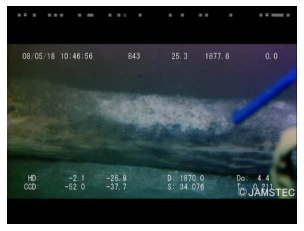

In [10]:
# load and display image
catIds = coco.getCatIds(catNms=['trash_wood']);
imgIds = coco.getImgIds(catIds=catIds);
img_id = imgIds[np.random.randint(0,len(imgIds))]
print('Image n°{}'.format(img_id))

img = coco.loadImgs(img_id)[0]

img_name = '%s/%s/%s'%(dataDir, dataType, img['file_name'])
#img_name = '%s/%s'%(dataDir, img['file_name'])
print('Image name: {}'.format(img_name))

I = io.imread(img_name)
plt.figure()
plt.imshow(I)
plt.axis('off')

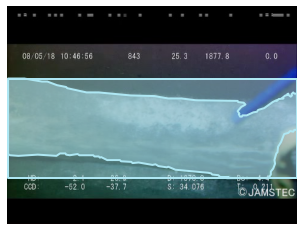

In [11]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [7]:
with open(annFile, 'r') as f:
    dataset = json.loads(f.read())

# select only trash
#trash_categories = [item for item in dataset['categories'] if item['name'].startswith('trash')]
cat_names = [item['name'] for item in dataset['categories'] if item['name'].startswith('trash')]
#trash_categories

# define variables
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

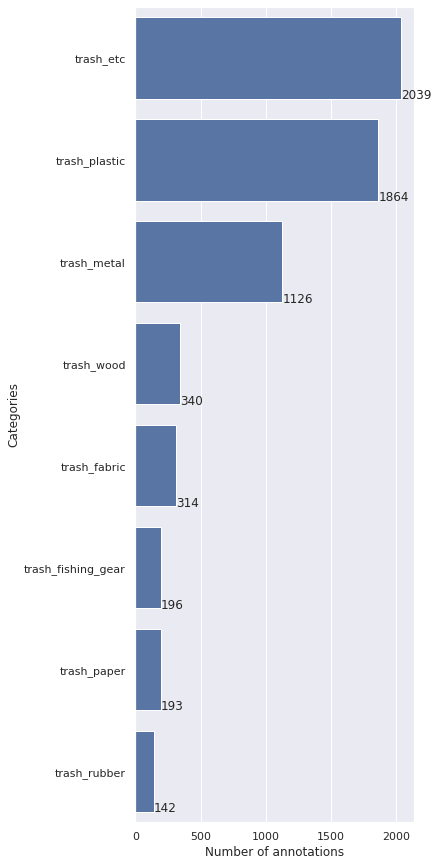

In [8]:
# Count annotations
cat_histogram = np.zeros(len(dataset['categories']),dtype=int)
for ann in dataset['annotations']:
    cat_histogram[ann['category_id'] - 1] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")
show_values_on_bars(plot_1, "h", 0.3)

In [9]:
print(len(dataset['images']), len([ann for ann in dataset['annotations'] if ann['image_id'] in [i['id'] for i in dataset['images']]]))

7212 6214


In [12]:
def trashcan_to_detectwaste(label):
    metals_and_plastics = ['trash_plastic', 'trash_metal']
    
    non_recyclable = ['trash_fabric', 'trash_rubber', 'trash_paper']
    
    other = ['trash_fishing_gear']
    bio = ['trash_wood']
    unknown = ['trash_etc']

    if (label in metals_and_plastics):
        label="metals_and_plastics"
    elif(label in non_recyclable):
        label="non-recyclable"
    elif(label in other):
        label="other"
    elif(label in bio):
        label="bio"
    elif(label in unknown):
        label="unknown"
    else:
        print(label, "is non-trashcan label")
        label = "unknown"
    return label

## Trash-ICRA19
- background: under watter
- classes: 7
- comment: captured frames of 3 videos (very similiar photos of the same objects)
- annotation: bboxes

In [13]:
dataDir='/dih4/dih4_2/wimlds/data/trash_icra19/'
dataType='all'
annFile='{}/{}_icra_coco.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [14]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(', '.join(nms)))

COCO categories: 
plastic, paper, unknown, cloth, rubber, metal, wood

COCO supercategories: 
none


Image n°7133
Image name: /dih4/dih4_2/wimlds/data/trash_icra19//all/obj0707_frame0000010.jpg


(-0.5, 479.5, 359.5, -0.5)

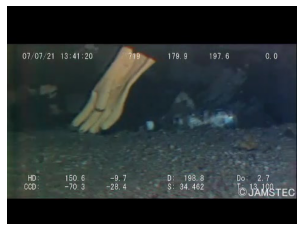

In [15]:
# load and display image
catIds = coco.getCatIds(catNms=['rubber']);
imgIds = coco.getImgIds(catIds=catIds);
img_id = imgIds[np.random.randint(0,len(imgIds))]
print('Image n°{}'.format(img_id))

img = coco.loadImgs(img_id)[0]

img_name = '%s/%s/%s'%(dataDir, dataType, img['file_name'])
#img_name = '%s/%s'%(dataDir, img['file_name'])
print('Image name: {}'.format(img_name))

I = io.imread(img_name)
plt.figure()
plt.imshow(I)
plt.axis('off')

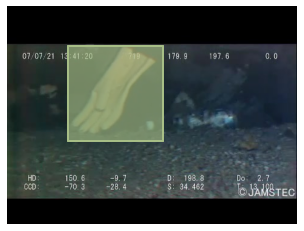

In [16]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [17]:
with open(annFile, 'r') as f:
    dataset = json.loads(f.read())

# select only trash
allowed_items = ['plastic', 'unknown', 'cloth', 'rubber', 'metal', 'wood', 'platstic', 'paper', 'papper']
cat_names = [item['name'] for item in dataset['categories'] if item['name'] in allowed_items]
trash_categories = [item for item in dataset['categories'] if item['name'] in allowed_items]

print(trash_categories)

# define variables
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

[{'supercategory': 'none', 'id': 1, 'name': 'plastic'}, {'supercategory': 'none', 'id': 2, 'name': 'paper'}, {'supercategory': 'none', 'id': 3, 'name': 'unknown'}, {'supercategory': 'none', 'id': 4, 'name': 'cloth'}, {'supercategory': 'none', 'id': 5, 'name': 'rubber'}, {'supercategory': 'none', 'id': 6, 'name': 'metal'}, {'supercategory': 'none', 'id': 7, 'name': 'wood'}]


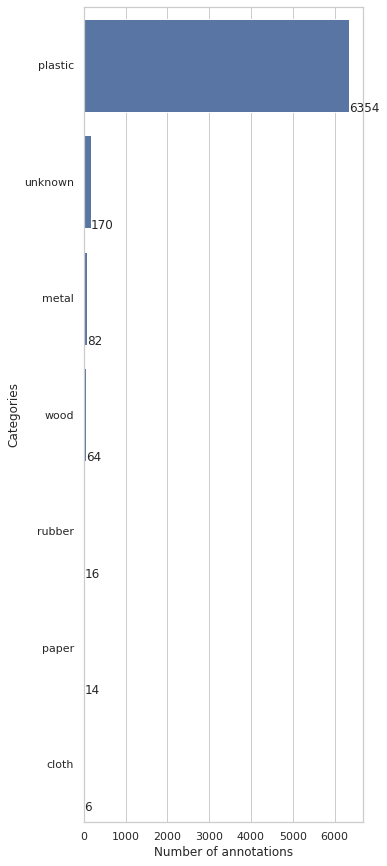

In [96]:
# Count annotations
cat_histogram = np.zeros(len(trash_categories),dtype=int)
for ann in dataset['annotations']:
    cat_histogram[ann['category_id'] - 1] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")
show_values_on_bars(plot_1, "h", 0.3)

In [97]:
print(len(dataset['images']), len([ann for ann in dataset['annotations'] if ann['image_id'] in [i['id'] for i in dataset['images']]]))

7668 6706


In [ ]:
def trashicra_to_detectwaste(label):
    metals_and_plastics = ['plastic', 'metal', 'rubber']
    non_recyclable = ['cloth', 'paper']
    bio = ['wood']
    unknown = ['unknown']

    if (label in metals_and_plastics):
        label="metals_and_plastics"
    elif(label in non_recyclable):
        label="non-recyclable"
    elif(label in bio):
        label="bio"
    elif(label in unknown):
        label="unknown"
    else:
        print(label, "is non-trashicra label")
        label = "unknown"
    return label

## UAVVaste
- background: outside
- classes: 1
- comment: very distance trash (from dron)
- annotation: instance masks

In [462]:
dataDir='/dih4/dih4_2/wimlds/data/uavvaste'
dataType='images'
annFile='{}/annotations.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [409]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(', '.join(nms)))

COCO categories: 
rubbish

COCO supercategories: 



Image n°526
Image name: /dih4/dih4_2/wimlds/data/uavvaste/images/batch_01_frame_23.jpg


(-0.5, 3839.5, 2159.5, -0.5)

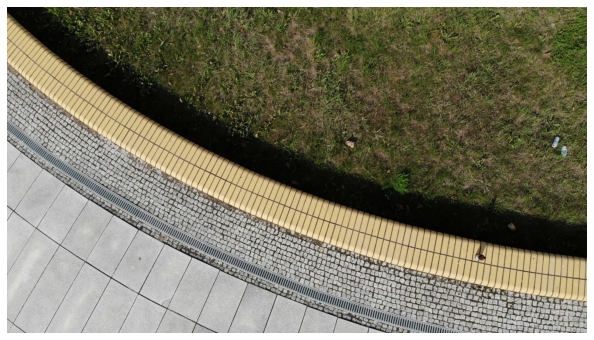

In [106]:
# load and display image
catIds = coco.getCatIds(catNms=['rubber']);
imgIds = coco.getImgIds(catIds=catIds);
img_id = imgIds[np.random.randint(0,len(imgIds))]
print('Image n°{}'.format(img_id))

img = coco.loadImgs(img_id)[0]

img_name = '%s/%s/%s'%(dataDir, dataType, img['file_name'])
#img_name = '%s/%s'%(dataDir, img['file_name'])
print('Image name: {}'.format(img_name))

I = io.imread(img_name)
plt.figure()
plt.imshow(I)
plt.axis('off')

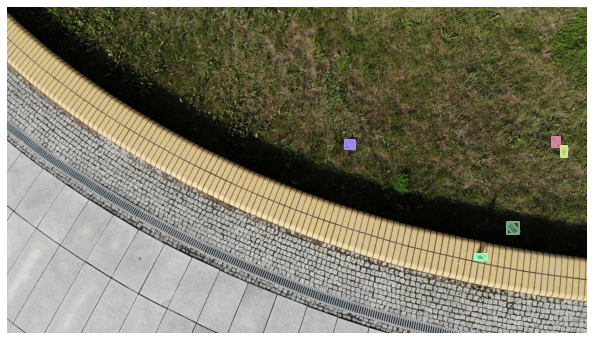

In [107]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [469]:
with open(annFile, 'r') as f:
    dataset = json.loads(f.read())

cat_names = [item['name'] for item in dataset['categories'] if item['name']]
trash_categories = dataset['categories']
    
# define variables
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

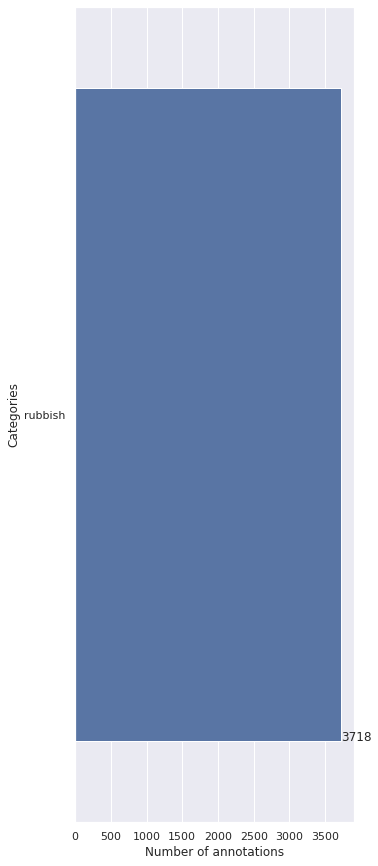

In [472]:
# Count annotations
cat_histogram = np.zeros(len(trash_categories),dtype=int)
for ann in dataset['annotations']:
    cat_histogram[ann['category_id'] - 1] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")
show_values_on_bars(plot_1, "h", 0.3)

## Drink waste
- background: indoor
- classes: 4
- comment: very similiar photos of the same objects
- annotation: bboxes

In [412]:
dataDir='/dih4/dih4_2/wimlds/data/'
dataType='drinking-waste/YOLO_imgs'
annFile='{}/drinkwaste_coco.json'.format(dataDir)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [118]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(', '.join(nms)))

COCO categories: 
AluCan, Glass, HDPEM, PET

COCO supercategories: 
Disinfect_5obj


Image n°2259
Image name: /dih4/dih4_2/wimlds/data//drinking-waste/YOLO_imgs/Glass987.jpg


(-0.5, 511.5, 682.5, -0.5)

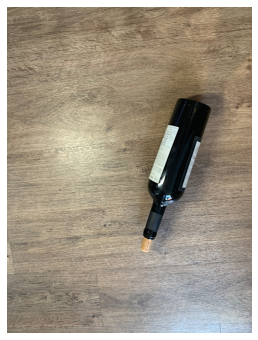

In [120]:
# load and display image
catIds = coco.getCatIds(catNms=['Glass']);
imgIds = coco.getImgIds(catIds=catIds);
img_id = imgIds[np.random.randint(0,len(imgIds))]
print('Image n°{}'.format(img_id))

img = coco.loadImgs(img_id)[0]

img_name = '%s/%s/%s'%(dataDir, dataType, img['file_name'])
#img_name = '%s/%s'%(dataDir, img['file_name'])
print('Image name: {}'.format(img_name))

I = io.imread(img_name)
plt.figure()
plt.imshow(I)
plt.axis('off')

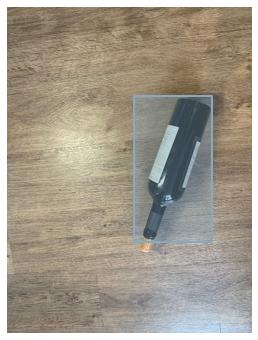

In [121]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [122]:
with open(annFile, 'r') as f:
    dataset = json.loads(f.read())

cat_names = [item['name'] for item in dataset['categories'] if item['name']]
trash_categories = dataset['categories']
    
# define variables
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

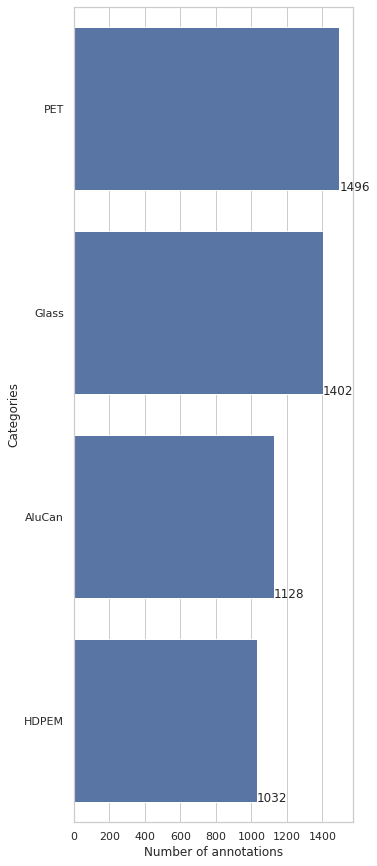

In [125]:
# Count annotations
cat_histogram = np.zeros(len(trash_categories),dtype=int)
for ann in dataset['annotations']:
    cat_histogram[ann['category_id'] - 1] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")
show_values_on_bars(plot_1, "h", 0.3)

In [126]:
def drinkingwaste_to_detectwaste(label):
    metals_and_plastics = ['PET', 'HDPEM', 'AluCan']
    glass = ['Glass']

    if (label in metals_and_plastics):
        label="metals_and_plastics"
    elif(label in glass):
        label="glass"
    else:
        print(label, "is non-drinkingwaste label")
        label = "unknown"
    return label

## MJU-Waste v1.0
- background: indoor, in hand
- classes: 1
- comment: such simply background, labolatroy
- annotation: instance masks (and depth - RGBD images)

In [475]:
dataDir='/dih4/dih4_2/wimlds/data/mju-waste-v1'
dataType='JPEGImages'
type_ann='all'
annFile='{}/mju-waste/{}.json'.format(dataDir, type_ann)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [476]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(', '.join(nms)))

COCO categories: 
Rubbish

COCO supercategories: 
Waste


Image n°2041
Image name: /dih4/dih4_2/wimlds/data/mju-waste-v1/JPEGImages/2019-12-04_16_21_21-57_color.png


(-0.5, 639.5, 479.5, -0.5)

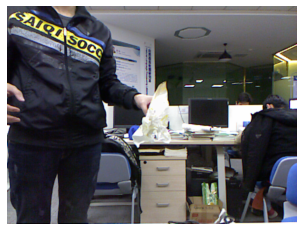

In [403]:
# load and display image
catIds = coco.getCatIds(catNms=['Rubbish']);
imgIds = coco.getImgIds(catIds=catIds);
img_id = imgIds[np.random.randint(0,len(imgIds))]
print('Image n°{}'.format(img_id))

img = coco.loadImgs(img_id)[0]

img_name = '%s/%s/%s'%(dataDir, dataType, img['file_name'])
#img_name = '%s/%s'%(dataDir, img['file_name'])
print('Image name: {}'.format(img_name))

I = io.imread(img_name)
plt.figure()
plt.imshow(I)
plt.axis('off')

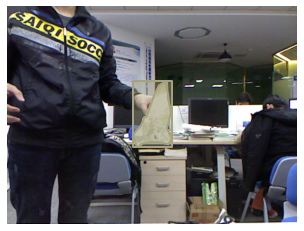

In [404]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [477]:
with open(annFile, 'r') as f:
    dataset = json.loads(f.read())

cat_names = [item['name'] for item in dataset['categories'] if item['name']]
trash_categories = dataset['categories']
    
# define variables
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

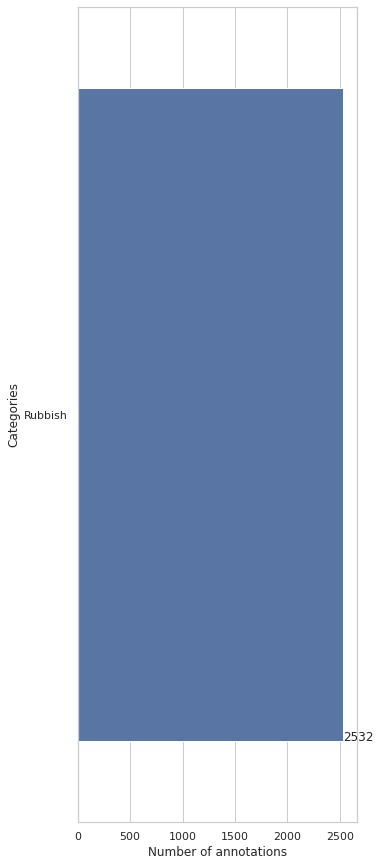

In [479]:
# Count annotations
cat_histogram = np.zeros(len(trash_categories),dtype=int)
for ann in dataset['annotations']:
    cat_histogram[ann['category_id'] - 1] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")
show_values_on_bars(plot_1, "h", 0.3)

## wade-ai
- background: outside, google maps
- classes: 1
- comment: roads and pavements
- annotation: instance masks

In [481]:
dataDir='/dih4/dih4_2/wimlds/data/wade-ai'
dataType='wade-ai_images'
type_ann='all'
annFile='{}/{}_wade_ai.json'.format(dataDir, type_ann)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.30s)
creating index...
index created!


In [321]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(', '.join(nms)))

COCO categories: 
Rubbish

COCO supercategories: 
Waste


Image n°612
Image name: /dih4/dih4_2/wimlds/data/wade-ai/wade-ai_images/11393.jpg


(-0.5, 639.5, 639.5, -0.5)

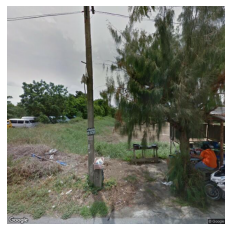

In [328]:
# load and display image
catIds = coco.getCatIds(catNms=['Rubbish']);
imgIds = coco.getImgIds(catIds=catIds);
img_id = imgIds[np.random.randint(0,len(imgIds))]
print('Image n°{}'.format(img_id))

img = coco.loadImgs(img_id)[0]

img_name = '%s/%s/%s'%(dataDir, dataType, img['file_name'])
#img_name = '%s/%s'%(dataDir, img['file_name'])
print('Image name: {}'.format(img_name))

I = io.imread(img_name)
plt.figure()
plt.imshow(I)
plt.axis('off')

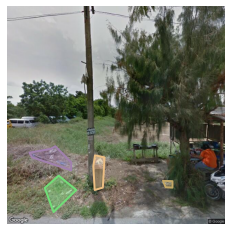

In [329]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)#, draw_bbox=True)

In [482]:
with open(annFile, 'r') as f:
    dataset = json.loads(f.read())

cat_names = [item['name'] for item in dataset['categories'] if item['name']]
trash_categories = dataset['categories']
    
# define variables
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

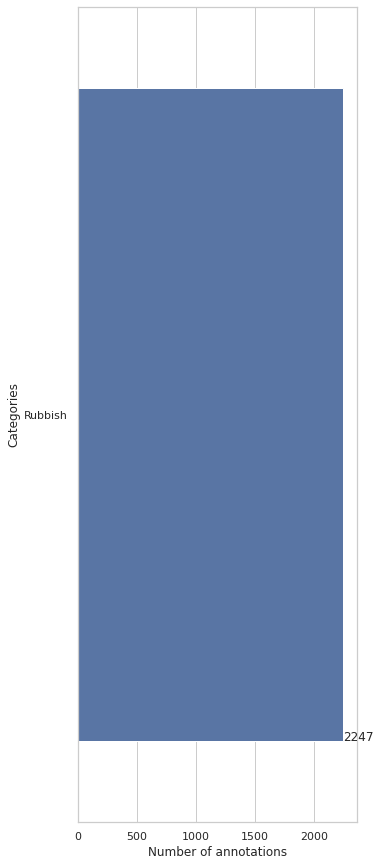

In [485]:
# Count annotations
cat_histogram = np.zeros(len(trash_categories),dtype=int)
for ann in dataset['annotations']:
    ann['category_id'] = 1
    cat_histogram[ann['category_id'] - 1] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")
show_values_on_bars(plot_1, "h", 0.3)

In [457]:
with open('/dih4/dih4_home/smajchrowska/detect-waste/annotations/annotations_binary_train.json', 'r') as f:
    dataset = json.loads(f.read())
cat_names = [item['name'] for item in dataset['categories'] if item['name']]
trash_categories = dataset['categories']
    
# define variables
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

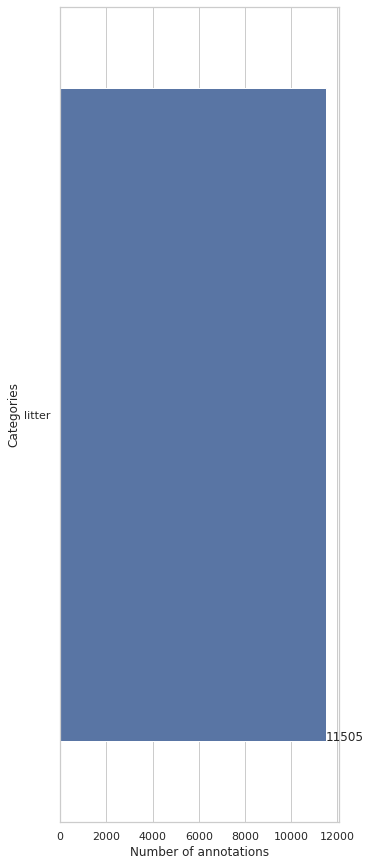

In [458]:
# Count annotations
cat_histogram = np.zeros(len(trash_categories),dtype=int)
for ann in dataset['annotations']:
    cat_histogram[ann['category_id']-1] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")
show_values_on_bars(plot_1, "h", 0.3)

In [459]:
len(imgs)

3647